
# Machine Learning & Content Analytics - AUEB

### Introduction to scraping
### Introduction to pandas

* Lab Assistant: George Perakis
* Email: gperakis[at]aeub.gr 

### Imports

In [1]:
from bs4 import BeautifulSoup
import requests as req
import pandas as pd
import re
import numpy as np
from tqdm import tqdm

/home/gperakis/.local/share/virtualenvs/Machine_Learning_&_Content_Analytics-t5O3WlDO/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### Case:

We want to find new desks for our new office at work. We search at skroutz.gr but it
provides only a filter about the length of the desk. 

We want to scrape the data to obtain the length, width, and height of the desks

In [2]:
print('https://www.skroutz.gr/c/1115/grafeia.html?order_by=pricevat&order_dir=asc&page=2')

https://www.skroutz.gr/c/1115/grafeia.html?order_by=pricevat&order_dir=asc&page=2


#### Let's scrap the 2nd page of the offices

In [3]:
url = 'https://www.skroutz.gr/c/1115/grafeia.html?order_by=pricevat&order_dir=asc&page={}'.format(2)

In [4]:
# using the 'requests' module we fetch the info of the page
response = req.get(url)
response

<Response [200]>

In [5]:
# extractring the content of the page
html = response.content

# Using BeautifulSoup library to parse the .html file.
soup = BeautifulSoup(html,
                     'html.parser')

In [6]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html itemscope="" itemtype="https://schema.org/WebPage" lang="el">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="#d57907" name="theme-color"/>
<title>Γραφεία - Σελίδα 2 - Skroutz.gr</title>
<meta content="Σύγκρινε τιμές για Γραφεία σε 187 καταστήματα στο Skroutz. Διάβασε αξιολογήσεις &amp; χρήσιμα σχόλια χρηστών - Σελ. 2 από 30" itemprop="description" name="description"/>
<meta content="index, follow" name="robots">
<meta content="081E82A82AE5126F0DB092AB6391B8AB" name="msvalidate.01"/>
<meta content="authenticity_token" name="csrf-param">
<meta content="rxGmDTTJIBygk8FlVbf24A+wR1iLSalNAWZ4sFg8a4845DDZ3peSjH4GYVTYUEFrHibDzaU5fdC/n2rEUTNuXg==" name="csrf-token">
<link href="/opensearch.xml" rel="search" title="Product search" type="application/opensearchdescrip

In [7]:
# Using the findAll function of the BeatifulSoup we filter only the class that we are interested in.
res = soup.findAll ('a', {'class' : 'js-sku-link'})

res

[<a class="js-sku-link pic" href="/s/17894458/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-Edge-120x73x75cm-28-0122.html" title="Γραφείο Edge 120x73x75cm 28-0122"><img alt="Γραφείο Edge 120x73x75cm 28-0122" src="//c.scdn.gr/images/sku_main_images/017894/17894458/large_20190327134942_grafeio_edge_120x73x75cm_28_0122.jpeg" title="Γραφείο Edge 120x73x75cm 28-0122"/></a>,
 <a class="js-sku-link" href="/s/17894458/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-Edge-120x73x75cm-28-0122.html" title="Γραφείο Edge 120x73x75cm 28-0122">Γραφείο Edge 120x73x75cm 28-0122</a>,
 <a class="js-sku-link sku-link" href="/s/17894458/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-Edge-120x73x75cm-28-0122.html" title="Γραφείο Edge 120x73x75cm 28-0122">36,57 €</a>,
 <a class="js-sku-link pic" href="/s/20181825/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-90x50x76cm-1702.html" title="Γραφείο 90x50x76cm 1702"><img alt="Γραφείο 90x50x76cm 1702" src="//a.scdn.gr/images/sku_main_images/020181/20181825/large_20190920154416_gr

In [8]:
# We are going to extract 3 things. 
# The descriptions of the desks, the prices and the url.

titles = list()
prices = list()
urls = list()

for i in res:
    # getting only the text for each class that was found.
    text = i.getText().strip()
    if text:
        print(text)
        
        if text[0].isdigit():
            prices.append(text)
                
        else:
            titles.append(text)
            urls.append('https://www.skroutz.gr/' + i['href'])

Γραφείο Edge 120x73x75cm 28-0122
36,57 €
Γραφείο 90x50x76cm 1702
36,90 €
Γραφείο 1628 90x50x76cm
36,90 €
Γραφείο 90x50x76cm 1631
36,90 €
Γραφείο Forma 120x60x75cm 28-0085
37,61 €
Γραφείο Forma 120x60x75cm 28-0141
37,88 €
Γραφείο File 110x50x75cm 28-0107
37,95 €
Γραφείο Βίκτωρ 90x50x75cm 14200039
37,99 €
Γραφείο 120x60x70cm 6-50-470-0009
38,20 €
Γραφείο 110x55x75cm TO-110WTABLE
38,22 €
Γραφείο Marita 110x40x79cm TO-TABLE110N
38,22 €
Γραφείο TO-110TABLE 110x55x75cm
38,22 €
Γραφείο Unit 120x60cm ΕΟ436
38,49 €
Γραφείο Lines 100x59x75cm 24-0528
38,57 €
Γραφείο Lines 100x59x75cm 24-0523
38,57 €
Γραφείο 120x59.5x74cm HM2268.01
38,90 €
Γραφείο 120x59.5x74cm HM2268.02
38,90 €
Γραφείο Balsam 120x60x75cm 14330011
38,99 €
Γραφείο Yucca 100x60x88cm 14330004
38,99 €
Γραφείο Lucas 100x60x73cm 072-000012
39,00 €
Γραφείο Lucas 100x60x73cm 072-000013
39,00 €
Γραφείο 120x70x74cm ΕΟ126,01New
39,00 €
Γραφείο 120x70x74cm ΕΟ124,01New
39,00 €
Γραφείο Joy Καρυδί 100x39x76cm LD09
39,00 €
Γραφείο Joy Δρυς 100x39

In [9]:
# the descriptions of the desks
titles

['Γραφείο Edge 120x73x75cm 28-0122',
 'Γραφείο 90x50x76cm 1702',
 'Γραφείο 1628 90x50x76cm',
 'Γραφείο 90x50x76cm 1631',
 'Γραφείο Forma 120x60x75cm 28-0085',
 'Γραφείο Forma 120x60x75cm 28-0141',
 'Γραφείο File 110x50x75cm 28-0107',
 'Γραφείο Βίκτωρ 90x50x75cm 14200039',
 'Γραφείο 120x60x70cm 6-50-470-0009',
 'Γραφείο 110x55x75cm TO-110WTABLE',
 'Γραφείο Marita 110x40x79cm TO-TABLE110N',
 'Γραφείο TO-110TABLE 110x55x75cm',
 'Γραφείο Unit 120x60cm ΕΟ436',
 'Γραφείο Lines 100x59x75cm 24-0528',
 'Γραφείο Lines 100x59x75cm 24-0523',
 'Γραφείο 120x59.5x74cm HM2268.01',
 'Γραφείο 120x59.5x74cm HM2268.02',
 'Γραφείο Balsam 120x60x75cm 14330011',
 'Γραφείο Yucca 100x60x88cm 14330004',
 'Γραφείο Lucas 100x60x73cm 072-000012',
 'Γραφείο Lucas 100x60x73cm 072-000013',
 'Γραφείο 120x70x74cm ΕΟ126,01New',
 'Γραφείο 120x70x74cm ΕΟ124,01New',
 'Γραφείο Joy Καρυδί 100x39x76cm LD09',
 'Γραφείο Joy Δρυς 100x39x76cm',
 'Γραφείο 150x74x71cm HM2284.02',
 'Γραφείο 150x71x74.5cm HM2284.01',
 'Επαγγελματικό 

In [10]:
# the prices of the desks in string format.
# We will take care of it afterwards.
prices

['36,57 €',
 '36,90 €',
 '36,90 €',
 '36,90 €',
 '37,61 €',
 '37,88 €',
 '37,95 €',
 '37,99 €',
 '38,20 €',
 '38,22 €',
 '38,22 €',
 '38,22 €',
 '38,49 €',
 '38,57 €',
 '38,57 €',
 '38,90 €',
 '38,90 €',
 '38,99 €',
 '38,99 €',
 '39,00 €',
 '39,00 €',
 '39,00 €',
 '39,00 €',
 '39,00 €',
 '39,00 €',
 '39,90 €',
 '39,90 €',
 '39,90 €',
 '39,90 €',
 '39,90 €',
 '39,90 €',
 '39,94 €',
 '39,99 €',
 '39,99 €',
 '40,00 €',
 '40,00 €',
 '40,00 €',
 '40,00 €',
 '40,57 €',
 '40,87 €',
 '41,50 €',
 '41,80 €',
 '41,80 €',
 '41,90 €',
 '41,99 €',
 '42,00 €',
 '42,30 €',
 '42,33 €']

In [11]:
# The URLs
urls

['https://www.skroutz.gr//s/17894458/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-Edge-120x73x75cm-28-0122.html',
 'https://www.skroutz.gr//s/20181825/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-90x50x76cm-1702.html',
 'https://www.skroutz.gr//s/12704302/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-1628-90x50x76cm.html',
 'https://www.skroutz.gr//s/13838571/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-90x50x76cm-1631.html',
 'https://www.skroutz.gr//s/9747075/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-Forma-120x60x75cm-28-0085.html',
 'https://www.skroutz.gr//s/22718046/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-Forma-120x60x75cm-28-0141.html',
 'https://www.skroutz.gr//s/16782284/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-File-110x50x75cm-28-0107.html',
 'https://www.skroutz.gr//s/14954607/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-%CE%92%CE%AF%CE%BA%CF%84%CF%89%CF%81-90x50x75cm-14200039.html',
 'https://www.skroutz.gr//s/19458481/%CE%93%CF%81%CE%B1%CF%86%CE%B5%CE%AF%CE%BF-120x60x70cm-6-50-4

### Let's do it for all the desks (around 20 pages)

In [12]:
titles = list()
prices = list()
urls = list()

for page in tqdm(range(1, 30)):
    
    # get the URL regarding the page
    url = 'https://www.skroutz.gr/c/1115/grafeia.html?order_by=pricevat&order_dir=asc&page={}'.format(page)
    
    r = req.get(url)
    html = r.content
    soup = BeautifulSoup(html, 'html.parser')
    
    res = soup.findAll ('a', {'class' : 'js-sku-link'})
    
    for i in res: 
    
        text = i.getText()
        
        if text:
            
            if text[0].isdigit():
                prices.append(text)
                
            else:
                titles.append(text)
                urls.append('https://www.skroutz.gr/' + i['href'])

100%|██████████| 29/29 [00:10<00:00,  2.64it/s]


In [13]:
data = pd.DataFrame({'desk_description': titles,
                     'price': prices,
                     'url': urls})

data.head()

,desk_description,price,url
0,Γραφείο Crown Flower 76x51x76cm 14330015,"20,99 €",https://www.skroutz.gr//s/19776102/%CE%93%CF%8...
1,Γραφείο Υπολογιστή Joy 60x48x73cm 3004320,"24,90 €",https://www.skroutz.gr//s/20756978/%CE%93%CF%8...
2,Γραφείο Υπολογιστή Joy Λευκό 60x48x73cm 3010985,"24,90 €",https://www.skroutz.gr//s/23146382/%CE%93%CF%8...
3,Γραφείο Cross 120x60x70cm 28-0123,"25,53 €",https://www.skroutz.gr//s/17894441/%CE%93%CF%8...
4,"Γραφείο Υπολογιστή 90x40x110cm ΕΟ401,2","27,63 €",https://www.skroutz.gr//s/21958843/%CE%93%CF%8...


In [14]:
# obtaining only the first part (excluding the euro)
data['price'] = data['price'].apply(lambda x: x.split()[0])
# replacing the dot (.) with nothing, and the comma (,) with a dot (.) 
data['price'] = data['price'].apply(lambda x: x.replace('.', '').replace(',', '.'))
# converting the string to float.
data['price'] = data['price'].apply(lambda x: float(x))

data.sample(5)

,desk_description,price,url
670,Γραφείο Denio Sonoma 139x60x76cm 14200190,124.99,https://www.skroutz.gr//s/19790471/%CE%93%CF%8...
259,Γραφείο 83030 120x60x140cm 271-92-017,68.50,https://www.skroutz.gr//s/19230890/%CE%93%CF%8...
1326,Γραφείο Rosy 120x70x78cm 0320517,541.88,https://www.skroutz.gr//s/18744313/%CE%93%CF%8...
583,Γραφείο Tetra 120x60x73cm 17423,112.72,https://www.skroutz.gr//s/16489074/%CE%93%CF%8...
1257,Επαγγελματικό Γραφείο Γωνιακό 196x160x76cm HM2...,359.90,https://www.skroutz.gr//s/20888029/%CE%95%CF%8...


In [15]:
def get_dimensions(text):
    """
    This function finds patterns 23x23x23 or 23.4x23.2x23.2
    """
    
    reg= '(\d+(?:.\d+)?)x(\d+(?:.\d+)?)x(\d+(?:.\d+)?)'
    
    # using the "re" library to extract the pattern that we want
    # by utilizing the aforementioned regular expression.
    res = re.findall(reg, text)
    
    try:
        if res:
            return {'desk_length': res[0][0].replace(',','.'),
                    'desk_width':  res[0][1].replace(',','.'),
                    'desk_height': res[0][2].replace(',','.')}

        return {}
    
    except ValueError:
        print(text)
        
def str_to_float(text):
    
    try: 
        return float(text)
    
    except ValueError: 
        return float(text.split()[-1])

In [16]:
dimensions = data['desk_description'].apply(get_dimensions).apply(pd.Series)

dimensions.sample(5)

,desk_length,desk_width,desk_height
98,1 100,75,60
85,120,80,60
1243,1353 150,75,80
594,120,60,74
1232,120,50,76


In [17]:
dimensions['desk_height']

0        76
1        73
2        73
3        70
4       110
       ... 
1387     75
1388     75
1389     75
1390     75
1391     75
Name: desk_height, Length: 1392, dtype: object

In [18]:
data = pd.concat([data, dimensions], axis=1)

data.head()

,desk_description,price,url,desk_length,desk_width,desk_height
0,Γραφείο Crown Flower 76x51x76cm 14330015,20.99,https://www.skroutz.gr//s/19776102/%CE%93%CF%8...,76,51,76
1,Γραφείο Υπολογιστή Joy 60x48x73cm 3004320,24.90,https://www.skroutz.gr//s/20756978/%CE%93%CF%8...,60,48,73
2,Γραφείο Υπολογιστή Joy Λευκό 60x48x73cm 3010985,24.90,https://www.skroutz.gr//s/23146382/%CE%93%CF%8...,60,48,73
3,Γραφείο Cross 120x60x70cm 28-0123,25.53,https://www.skroutz.gr//s/17894441/%CE%93%CF%8...,120,60,70
4,"Γραφείο Υπολογιστή 90x40x110cm ΕΟ401,2",27.63,https://www.skroutz.gr//s/21958843/%CE%93%CF%8...,90,40,110


In [19]:
data['desk_height'] = data['desk_height'].apply(str_to_float)
data['desk_width'] = data['desk_width'].apply(str_to_float)
data['desk_length'] = data['desk_length'].apply(str_to_float)

In [20]:
# data.to_csv('skroutz_desks.csv',
#             encoding='utf-8',
#             index=False)

In [21]:
from ipywidgets import interact

In [22]:
@interact
def filter_desks(width=60, max_price=100):
    
    width_filter = data['desk_width'] <= width
    price_filter = data['price'] <= max_price
    
    
    return data[width_filter & price_filter].sort_values(['desk_width', 'desk_length', 'price'])

interactive(children=(IntSlider(value=60, description='width', max=180, min=-60), IntSlider(value=100, descrip…

In [23]:
data['desk_description'] = data['desk_description'].str.replace('.', ' ').str.replace('x', ' ')

In [24]:
data['desk_description']

0                Γραφείο Crown Flower 76 51 76cm 14330015
1               Γραφείο Υπολογιστή Joy 60 48 73cm 3004320
2         Γραφείο Υπολογιστή Joy Λευκό 60 48 73cm 3010985
3                       Γραφείο Cross 120 60 70cm 28-0123
4                  Γραφείο Υπολογιστή 90 40 110cm ΕΟ401,2
                              ...                        
1387                            Γραφείο Care 250 110 75cm
1388                             Γραφείο Fit 250 110 75cm
1389             Τραπέζι Συνεδριάσεων Status 250 110 75cm
1390               Τραπέζι Συνεδριάσεων Lead 220 120 75cm
1391    Επαγγελματικό Γραφείο Γωνιακό Platinum Plus 20...
Name: desk_description, Length: 1392, dtype: object

In [25]:
def get_important_tokens(tokens):
    
    filtered = list()
    
    
    for t in tokens:
        
        if t.isupper():
            continue
        
        if len(t) > 1 and t[0].isalpha() and t[-1].isalpha():
            filtered.append(t)
    
    return ' '.join(filtered)


data['tokens'] = data['desk_description'].apply(lambda x: get_important_tokens(x.split(' ')))

data['tokens'].sample(20)

333                             Γραφείο Swan
1213                       Γραφείο Todo Μπλε
777                        Γραφείο Noce Puro
189                            Γραφείο Happy
899                            Γραφείο Duple
933               Γραφείο Lillo Ανοιχτό Γκρι
915                             Γραφείο Bond
1318                   Γραφείο Γωνιακό Maven
1332    Επαγγελματικό Γραφείο Γωνιακό Alpine
439                           Γραφείο Sergio
1192           Επαγγελματικό Γραφείο Γωνιακό
500                     Τραπέζι Συνεδριάσεων
905                             Γραφείο Elma
1107                  Γραφείο Υπολογιστή Art
471                             Γραφείο Ojos
338                          Γραφείο Tobacco
280            Επαγγελματικό Γραφείο ecutive
580                                  Γραφείο
936                            Γραφείο Ramos
192                             Γραφείο Solo
Name: tokens, dtype: object

In [26]:
words = '. '.join(data['tokens'])
words

'Γραφείο Crown Flower. Γραφείο Υπολογιστή Joy. Γραφείο Υπολογιστή Joy Λευκό. Γραφείο Cross. Γραφείο Υπολογιστή. Γραφείο. Γραφείο Speed. Γραφείο Flash. Γραφείο African Tulip. Γραφείο Alamanda. Γραφείο Υπολογιστή Unit. Γραφείο Bike. Γραφείο. Γραφείο. Γραφείο. Γραφείο Constantia. Γραφείο Marion. Γραφείο Marion. Γραφείο Eiffel. Γραφείο Program. Γραφείο Υπολογιστή. Γραφείο African Tulip. Γραφείο. Γραφείο. Γραφείο. Γραφείο Υπολογιστή. Γραφείο Dynamic. Γραφείο. Γραφείο Υπολογιστή. Γραφείο. Γραφείο Decon. Γραφείο Numbers. Γραφείο Decon. Γραφείο Decon. Γραφείο Decon. Γραφείο Wero. Γραφείο Crocosmia. Γραφείο Paolo. Γραφείο Ramon. Γραφείο. Γραφείο Ma. Γραφείο Eli. Γραφείο. Γραφείο Constantia Γκρι. Γραφείο. Γραφείο. Γραφείο. Γραφείο. Γραφείο Edge. Γραφείο. Γραφείο. Γραφείο. Γραφείο Forma. Γραφείο Forma. Γραφείο File. Γραφείο Βίκτωρ. Γραφείο. Γραφείο. Γραφείο Marita. Γραφείο. Γραφείο Unit. Γραφείο Lines. Γραφείο Lines. Γραφείο. Γραφείο. Γραφείο Balsam. Γραφείο Yucca. Γραφείο Lucas. Γραφείο Lucas. Γ

In [27]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import matplotlib.pyplot as plt

To get the custom shape for the word cloud, look for an image that you want to use as a mask. In this example, I used the following image as an outline

In [28]:
print('https://www.therange.co.uk/_m5/6/3/1563447053_5291.jpg')

https://www.therange.co.uk/_m5/6/3/1563447053_5291.jpg


In [29]:
mask = np.array(
    Image.open(
        req.get('https://www.therange.co.uk/_m5/6/3/1563447053_5291.jpg',
                stream=True).raw)
)
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [30]:
def generate_wordcloud(words: str, mask: np.array, w: int=512, h: int=512, stopwords=STOPWORDS):
    
    word_cloud = WordCloud(width = w,
                           height = h, 
                           background_color='white', 
                           stopwords=stopwords,
                           mask=mask).generate(words)
    
    plt.figure(figsize=(10,8),
               facecolor='white',
               edgecolor='blue')
    
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

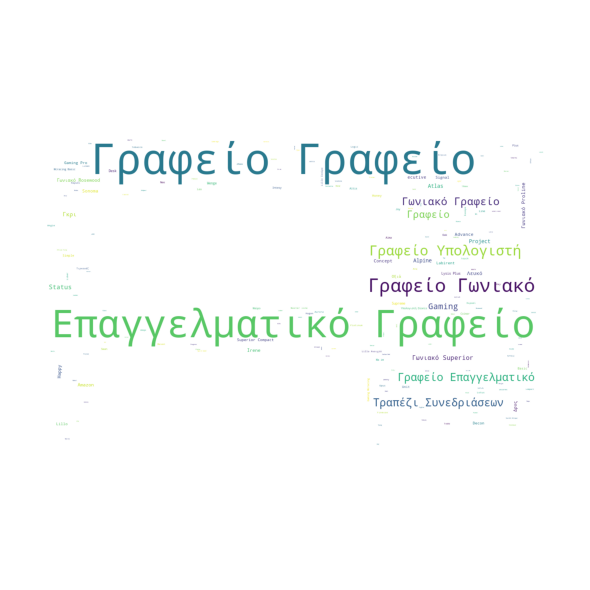

In [31]:
generate_wordcloud(words=words, mask=mask)